<a href="https://colab.research.google.com/github/kenltho2/Num-Meth23/blob/main/copy_of_project2_ver3incorrectformulaforpart2needsfixed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#true error
def terror(true, approx):
  error_t = true - approx
  return error_t

#relative true error 
def rterror(terror,tValue):
  RTerror = terror / tValue
  return RTerror

# function for e^x
def f(x):
  return math.exp(x)

# forward difference
def forward(x,h):
  forx = ((f(x+h) - f(x))) / h
  return forx

# backward difference
def backward(x,h):
  backx = ((f(x-h) - f(x))) / h
  return backx

# central difference
def center(x,h):
  centerx = ((f(x+h) - f(x-h))) / (2*h)
  return centerx

#finite difference
def finite(x,h):
  second_deriv = ( ( f(x+h) - 2*f(x) - f(x+h) ) ) / h**2
  return second_deriv

In [ ]:
# dataframe for my approximations at x=2, using the .append feature
# .append feature is "deprecated" so used pd.concat but left this as another example
#df = pd.DataFrame(columns = ['h','true value','front estimate','back estimate','center estimate','finite difference'])
#for i in range(1,6):
 # df = df.append({'h': 1/10**i,
  #                'true value': f(2),
   #               'front estimate': forward(2,1/10**i),
    #              'back estimate': backward(2, 1/10**i),
     #             'center estimate': center(2,1/10**i),
      #            'finite difference': finite(2,1/10**i)},
       #           ignore_index=True)

#df

In [ ]:
#Pandas Data Frame(s) laying out our data, separated into individual dataframes to concatenate at will later.
# using for loops to fill each frame with appropriate data
tx = 5 # tx is number of rows
dfh = pd.DataFrame({'h': [10**-i for i in range(1,tx+1)]})
dftrue = pd.DataFrame({'true val.': [f(2) for i in range(1,tx+1)]})
dfforward = pd.DataFrame({'forward est.': [forward(2,10**-i) for i in range(1,tx+1)]})
dfback = pd.DataFrame({'back est.': [backward(2,10**-i) for i in range(1,tx+1)]})
dfcenter = pd.DataFrame({'center est.': [center(2,10**-i) for i in range(1,tx+1)]})
dffinite = pd.DataFrame({'finite diff.': [finite(2,10**-i) for i in range(1,tx+1)]})

# dataframes for error values
dfForTruErr= pd.DataFrame({'forward true err.': [terror(f(2),forward(2,10**-i)) for i in range(1,tx+1)]})
dfBackTruErr = pd.DataFrame({'back true err.': [terror(f(2),backward(2,10**-i)) for i in range(1,tx+1)]})
dfCenterTruErr = pd.DataFrame({'center true err.': [terror(f(2),center(2,10**-i)) for i in range(1,tx+1)]})
dfForRelErr = pd.DataFrame({'forward relative err.': [rterror(terror(f(2),forward(2,10**-i)),f(2)) for i in range(1, tx+1)]})
dfBackRelErr = pd.DataFrame({'back relative err': [rterror(terror(f(2),backward(2,10**-i)),f(2)) for i in range(1, tx+1)]})
dfCenRelErr = pd.DataFrame({'center relative err': [rterror(terror(f(2),center(2,10**-i)),f(2)) for i in range(1, tx+1)]})

In [ ]:
Forward_Table = pd.concat([dfh,dftrue,dfforward,dfForTruErr,dfForRelErr], axis= 1)
Forward_Table

,h,true val.,forward est.,forward true err.,forward relative err.
0,0.10000,7.389056,7.771138,-0.382082,-0.051709
1,0.01000,7.389056,7.426125,-0.037069,-0.005017
2,0.00100,7.389056,7.392752,-0.003696,-0.000500
3,0.00010,7.389056,7.389426,-0.000369,-0.000050
4,0.00001,7.389056,7.389093,-0.000037,-0.000005


In [ ]:
Backward_Table = pd.concat([dfh,dftrue,dfback,dfBackTruErr,dfBackRelErr], axis = 1)
Backward_Table

,h,true val.,back est.,back true err.,back relative err
0,0.10000,7.389056,-7.031617,14.420673,1.951626
1,0.01000,7.389056,-7.352234,14.741290,1.995017
2,0.00100,7.389056,-7.385363,14.774419,1.999500
3,0.00010,7.389056,-7.388687,14.777743,1.999950
4,0.00001,7.389056,-7.389019,14.778075,1.999995


In [ ]:
Center_Table = pd.concat([dfh,dftrue,dfcenter,dfCenterTruErr,dfCenRelErr], axis = 1)
Center_Table

,h,true val.,center est.,center true err.,center relative err
0,0.10000,7.389056,7.401377,-1.232125e-02,-1.667500e-03
1,0.01000,7.389056,7.389179,-1.231516e-04,-1.666675e-05
2,0.00100,7.389056,7.389057,-1.231509e-06,-1.666666e-07
3,0.00010,7.389056,7.389056,-1.232264e-08,-1.667688e-09
4,0.00001,7.389056,7.389056,-1.856799e-10,-2.512904e-11


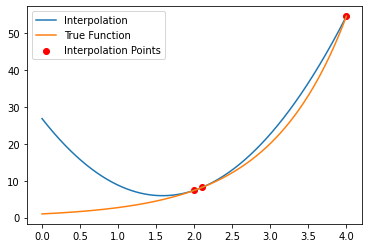

In [ ]:
import matplotlib.pyplot as plt

# Define the function we want to interpolate
def f(x):
    return np.exp(x)

# Define the points we want to use for interpolation
center = 2
x_vals = [center, center + 0.1, 2*center]
y_vals = [f(x) for x in x_vals]

# Define a function to compute the Lagrange polynomial
def lagrange(x, x_vals, y_vals):
    n = len(x_vals)
    lag_poly = 0
    for i in range(n):
        term = y_vals[i]
        for j in range(n):
            if i != j:
                term *= (x - x_vals[j]) / (x_vals[i] - x_vals[j])
        lag_poly += term
    return lag_poly

# Interpolate the function at center + 0.2
interp_x = center + 0.2
interp_y = lagrange(interp_x, x_vals, y_vals)
true_y = f(interp_x)

# Compute the absolute and relative errors
abs_error = abs(interp_y - true_y)
rel_error = abs_error / abs(true_y)

# Compute the second derivative of the Lagrange polynomial
def lagrange_second_deriv(x, x_vals, y_vals):
    n = len(x_vals)
    lag_poly_second_deriv = 0
    for i in range(n):
        term = 0
        for j in range(n):
            if i != j:
                term += 1 / (x_vals[i] - x_vals[j])
        term *= y_vals[i]
        for j in range(n):
            if i != j:
                term *= (x - x_vals[j])
        lag_poly_second_deriv += term
    return 2 * lag_poly_second_deriv / ((interp_x - center)**2)

# Compute the absolute and relative errors of the second derivative
interp_second_deriv = lagrange_second_deriv(interp_x, x_vals, y_vals)
true_second_deriv = f(interp_x)

abs_error_second_deriv = abs(interp_second_deriv - true_second_deriv)
rel_error_second_deriv = abs_error_second_deriv / abs(true_second_deriv)

# Plot the interpolation and the original function
x_range = np.linspace(0, 2*center, 1000)
interp_y_vals = [lagrange(x, x_vals, y_vals) for x in x_range]
true_y_vals = [f(x) for x in x_range]

plt.plot(x_range, interp_y_vals, label="Interpolation")
plt.plot(x_range, true_y_vals, label="True Function")
plt.scatter(x_vals, y_vals, color="red", label="Interpolation Points")
plt.legend()
plt.show()
